# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000, na_values=['Unknown', 'UNKNOWN'],)

/Users/chandrimachatterjee/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [4]:
df.info
#Row - adopted dog
#Column -  Vaccinated
#Column - Gender

<bound method DataFrame.info of        Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0               10024     BLUE MACK             M                   NaN   
1               10461  Indie Zephir             M            Rottweiler   
2               10013         Bilal             M  Australian Cattledog   
3               10025         Buddy             M                   NaN   
4               10013           Ali             M               Basenji   
...               ...           ...           ...                   ...   
29995           11372         Bella             F                   NaN   
29996           11417         Sadie             F  Schnauzer, Miniature   
29997           11228       unknown             M            Pomeranian   
29998           11217         daisy             F                   NaN   
29999           10038       Squeeze             M              Shih Tzu   

      Secondary Breed Animal Dominant Color Animal Secondary Color 

## Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

#Do we get rid of NA values at the first step or later?
#What is the most popular dog in NYC?
#Are most dogs in NYC male or female?
#I wish this dataset could also say if there are mult-dog homes? And how common they are. 


# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

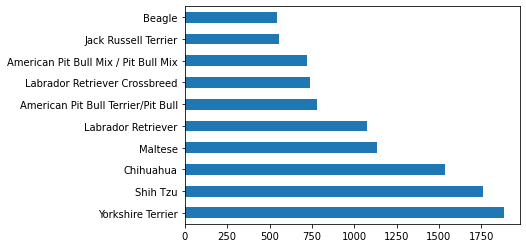

In [7]:
df['Primary Breed'].value_counts().head(10).plot.barh()

## What are the most popular dog names?

In [8]:
df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
df[df['Animal Name'] == 'Max'].shape
#or len(df[df['Animal Name'] == 'Maxwell'])
#or df[df['Animal Name'] == 'Maxwell'].count

(202, 15)

In [10]:
df[df['Animal Name'] == 'Maxwell'].shape

(11, 15)

In [9]:
df[df['Animal Name'] == 'Murray'].shape
#I chose my dog's name instead of mine. 

(8, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [12]:
df['Guard or Trained'].value_counts(normalize = True)*100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [44]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
df.tail() 
#it is the same though... did I do something wrong?

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05
29999,10038,Squeeze,M,Shih Tzu,NaN,TAN,WHITE,NaN,2012-03-01,Yes,No,Yes,2015-08-22 19:20:53.700,2015-08-22,2016-07-23


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [53]:
df['Guard or Trained'].fillna('No', inplace=True)

In [54]:
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [69]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

German Shepherd Dog           3
Golden Retriever              1
Schnauzer, Miniature          1
German Shepherd Crossbreed    1
Doberman Pinscher             1
Labrador Retriever            1
Rottweiler                    1
Poodle, Standard              1
Shih Tzu                      1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [72]:
df['Year']=df['Animal Birth'].apply(lambda birth: birth.year)
df.head()
#i needed help here

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

# Joining data together

In [80]:
df['Age'] = 2021 - df['Year']
df.Age.mean().round()

12.0

In [81]:
df.Age.describe()
#another way to do it

count    30000.000000
mean        11.712433
std          4.066803
min          6.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         37.000000
Name: Age, dtype: float64

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [18]:
df_hood = pd.read_csv("zipcodes-neighborhoods.csv")
df = df.merge(df_hood, left_on='Owner Zip Code', right_on='zip')
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29568,11436,Jack,M,Jack Russell Terrier,NaN,WHITE,BLACK,BROWN,2010-01-01,Yes,No,Yes,2015-08-09 17:43:18.710,2015-08-09,2016-08-10,Jamaica,11436,Queens
29569,11436,ROXY,F,NaN,\HAR PEI X,BLACK,NaN,NaN,2003-01-01,Yes,No,Yes,2015-08-12 06:37:28.877,2015-08-12,2017-08-30,Jamaica,11436,Queens
29570,11436,marco,M,Yorkshire Terrier,NaN,BROWN,GRAY,NaN,2009-01-01,No,No,Yes,2015-08-13 10:20:46.697,2015-08-13,2016-08-20,Jamaica,11436,Queens
29571,11436,Maximilian,M,Shih Tzu,NaN,WHITE,TAN,NaN,2004-01-01,Yes,No,Yes,2015-08-19 11:49:32.743,2015-08-19,2016-08-30,Jamaica,11436,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [19]:
df[df['neighborhood']=='Upper East Side']['Animal Name'].value_counts().head()

Charlie    19
Bella      12
NO NAME    11
Lucy       10
Lola       10
Name: Animal Name, dtype: int64

In [21]:
df[df['borough']=='Bronx']['Animal Name'].value_counts().head()

Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: Animal Name, dtype: int64

In [22]:
df[df['borough']=='Brooklyn']['Animal Name'].value_counts().head()

Max        46
unknown    45
Bella      45
Charlie    42
Rocky      36
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [25]:
df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0)

,count,unique,top,freq
neighborhood,,,,
Borough Park,531,99,Yorkshire Terrier,49
Bronx Park and Fordham,305,61,Yorkshire Terrier,39
Bushwick and Williamsburg,525,101,Yorkshire Terrier,47
Canarsie and Flatlands,456,92,Shih Tzu,56
Central Bronx,231,52,Yorkshire Terrier,29
Central Brooklyn,621,119,Shih Tzu,52
Central Harlem,453,92,Chihuahua,48
Central Queens,259,61,Yorkshire Terrier,34
Chelsea and Clinton,1302,132,Chihuahua,80


In [28]:
df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [121]:
df2=df.groupby(['Primary Breed'])['Spayed or Neut'].value_counts(normalize = True).to_frame()*100
df2['Spayed or Neut'] = df2['Spayed or Neut'].astype(int)
df2[df2['Spayed or Neut'] == 1]

,,Spayed or Neut
Primary Breed,Spayed or Neut,
Bassett Hound,No,1
Greyhound,No,1


In [100]:
df.groupby(['Animal Gender'])['Spayed or Neut'].value_counts()


Animal Gender  Spayed or Neut
               Yes                   3
F              Yes               11620
               No                 1930
M              Yes               12677
               No                 3343
Name: Spayed or Neut, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [132]:
df_dc = df['Animal Dominant Color'].str.lower() .isin(['black', 'white','gray','grey']) | df['Animal Dominant Color'].isna()
df_sc = df['Animal Secondary Color'].str.lower() .isin(['black', 'white','gray','grey']) | df['Animal Dominant Color'].isna()
df_tc = df['Animal Third Color'].str.lower().isin(['black', 'white','gray','grey']) | df['Animal Dominant Color'].isna()
df['monochrome'] = df_dc & df_sc & df_tc

In [134]:
df.monochrome.value_counts()

False    29054
True       519
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [33]:
df['borough'].value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

<AxesSubplot:>

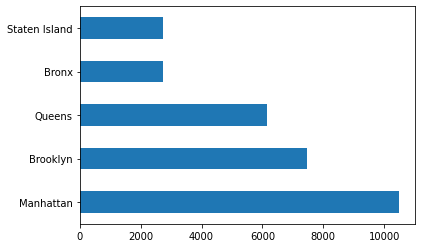

In [34]:
df['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [35]:
df_pop = pd.read_csv("boro_population.csv")
df_pop.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [ ]:
df_borodog = pd.d

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?